<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [355]:
#load the data
house = pd.read_csv('./housing.csv')

In [356]:
house.shape

(1460, 81)

>There are large amounts of columns and rows. Changing the max column and row view in pandas will help in legibility.

In [357]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 82
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [358]:
# Let's see the documentation.
f = open('./data_description.txt', 'r') 
print f.read()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

>Dropping the ID feature makes sense as it gives superfluous information (the index is already an identifier for the house if anything).


In [359]:
df = house.drop(['Id'], axis=1)

In [360]:
nulls = df.isnull().sum().sort_values(ascending=False)
nulls = nulls[nulls>0]
nulls

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

>From this, it is clear that there are some features with a large amount of null values. Looking through the descriptions for each of the features carrying null values, it should be safe to assume that the null values indicate that the feature is missing in the property. The only one that had a problem was the 'Electrical' feature, so I just dropped that row as it had only 1 missing value.

In [361]:
df.dropna(subset=['Electrical'],inplace=True)
nulls = df.isnull().sum().sort_values(ascending=False)
nulls = nulls[nulls>0]
nulls

PoolQC          1452
MiscFeature     1405
Alley           1368
Fence           1178
FireplaceQu      689
LotFrontage      259
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
dtype: int64

Before imputing the null values, I decided to engineer a new feature into the dataset which had the count of null values for each house. I named this feature sumnull.

In [362]:
df['sumnull'] = df.isnull().sum(axis=1)
print df.shape
df['sumnull'].head()

(1459, 81)


0    5
1    4
2    4
3    4
4    4
Name: sumnull, dtype: int64

> I imputed the null values within the features with Nones or 0 (depending on whether it is a float or an object type).

In [363]:
for feature in nulls.index.values:
    if df[feature].dtype == object:
        df[feature].fillna('None', inplace=True)
    elif df[feature].dtype == float:
        df[feature].fillna(0.,  inplace=True)
    else:
        print 'error'
        break

df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [364]:
# Removing commercial property
print df.shape
df = df.loc[df['MSZoning'] != 'C (all)',:]
print df.shape

(1459, 81)
(1449, 81)


> Now I will create the predictors (X) and the target (y).

In [174]:
y= df['SalePrice']
X = df.drop('SalePrice', axis=1)
print df.shape, X.shape, y.shape

(1449, 81) (1449, 80) (1449,)


> Now I will separate out the renovatable and non-renovatable features.
Note: This is subjective.

In [152]:
renovatables = ['OverallQual','OverallCond','YearRemodAdd','RoofStyle','RoofMatl', \
                'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond', \
                'BsmtCond','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual', \
                'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond',\
                'PavedDrive','PoolQC','Fence','Electrical']
nonrenovatables = [col for col in X.columns if not col in renovatables]
print nonrenovatables

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'MasVnrArea', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'sumnull']


In [14]:
Xn = X[nonrenovatables]
print Xn.shape
Xn.head()

(1449, 56)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,MasVnrArea,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,sumnull
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,196.0,PConc,Gd,No,706,0,150,856,GasA,Y,856,854,0,1710,1,0,2,1,3,1,8,0,Attchd,2003.0,2,548,0,61,0,0,0,0,None,0,2,2008,WD,Normal,5
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,0.0,CBlock,Gd,Gd,978,0,284,1262,GasA,Y,1262,0,0,1262,0,1,2,0,3,1,6,1,Attchd,1976.0,2,460,298,0,0,0,0,0,None,0,5,2007,WD,Normal,4
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,162.0,PConc,Gd,Mn,486,0,434,920,GasA,Y,920,866,0,1786,1,0,2,1,3,1,6,1,Attchd,2001.0,2,608,0,42,0,0,0,0,None,0,9,2008,WD,Normal,4
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1915,0.0,BrkTil,TA,No,216,0,540,756,GasA,Y,961,756,0,1717,1,0,1,0,3,1,7,1,Detchd,1998.0,3,642,0,35,272,0,0,0,None,0,2,2006,WD,Abnorml,4
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2000,350.0,PConc,Gd,Av,655,0,490,1145,GasA,Y,1145,1053,0,2198,1,0,2,1,4,1,9,1,Attchd,2000.0,3,836,192,84,0,0,0,0,None,0,12,2008,WD,Normal,4


>Now I will separate out the categorical features from the continuous features and analyse them separately.

In [15]:
# Categorical features
categorical = [col for col in Xn.columns if Xn[col].dtype == object]
print categorical

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'Foundation', 'BsmtQual', 'BsmtExposure', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']


In [16]:
# Continuous features
continuous = [col for col in Xn.columns if Xn[col].dtype != object]
print continuous

['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'sumnull']


In [18]:
Xcont = X[continuous]  # Continuous predictors
Xcat = X[categorical]  # Categorical predictors

In [19]:
Xcaty = pd.concat([Xcat,y], axis=1)
Xconty = pd.concat([Xcont,y], axis=1)
print Xcat.shape, Xcont.shape
print Xcaty.shape, Xconty.shape

(1449, 22) (1449, 34)
(1449, 23) (1449, 35)


> Here I plotted the heatmap for continuous features to see what the correlation between the features and the saleprice is.

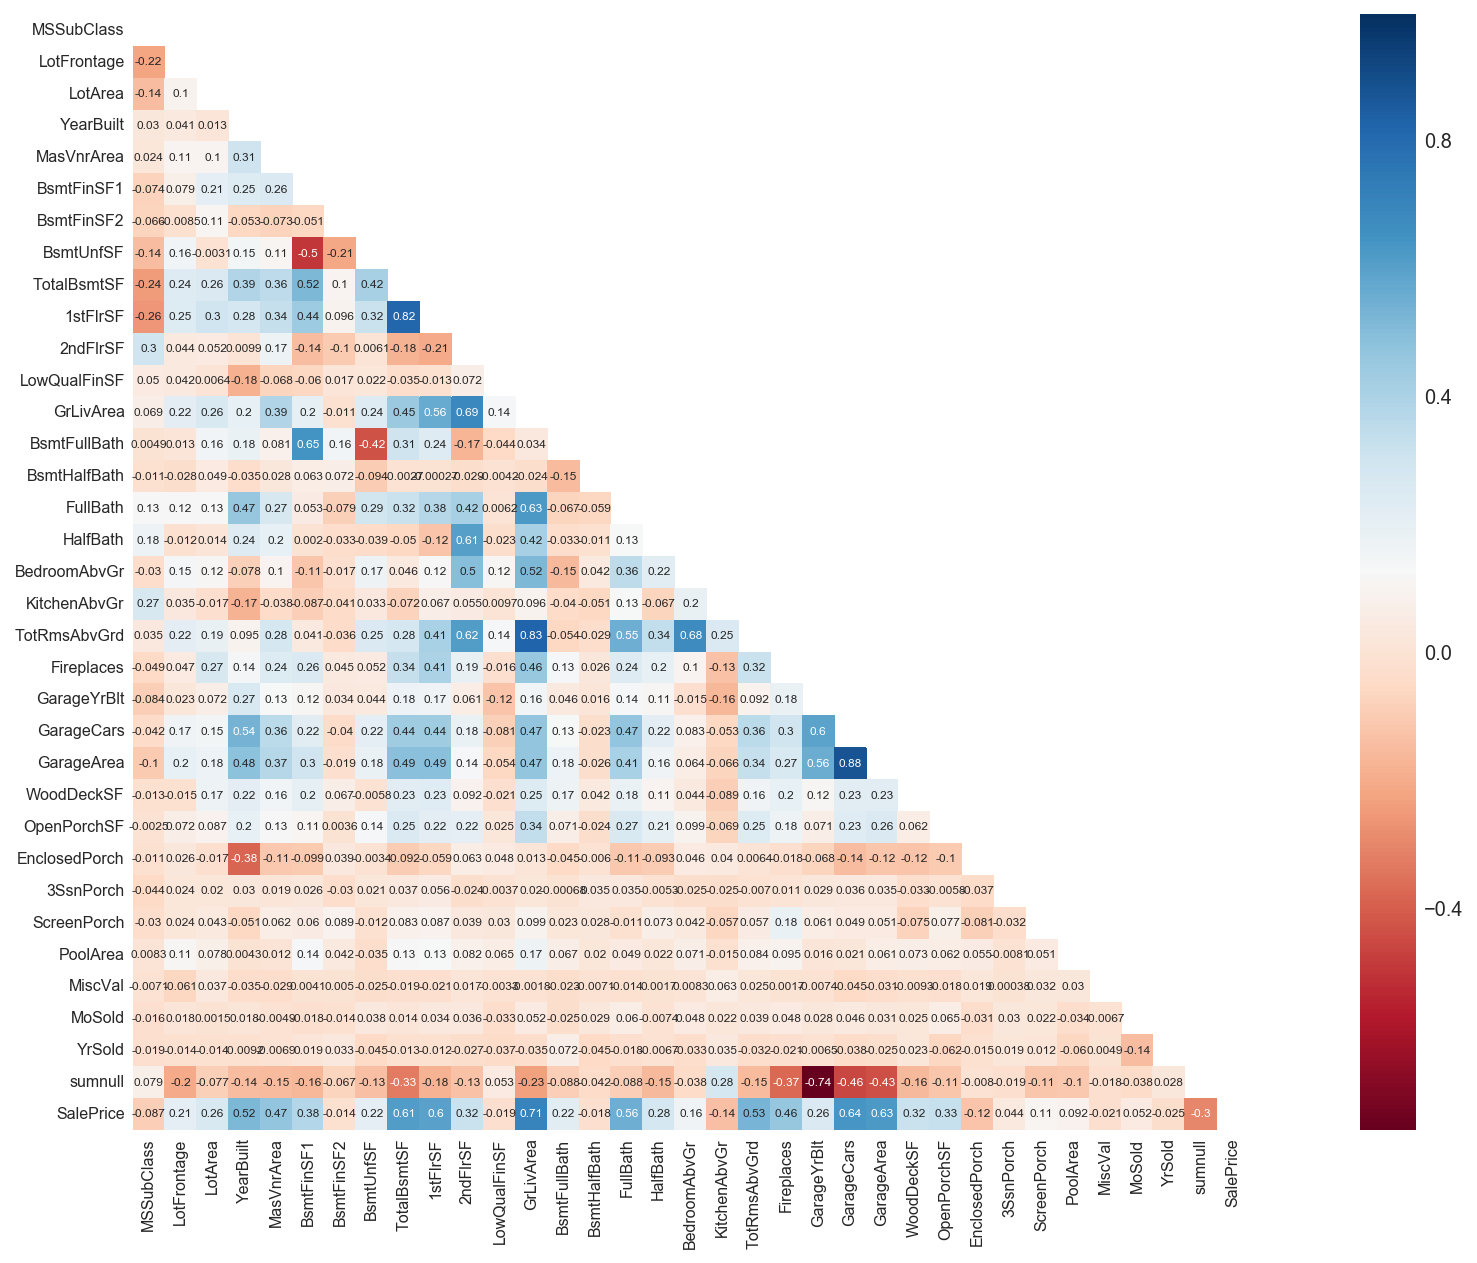

In [20]:
sns.set_palette("RdBu", n_colors=10)
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(20,10))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, cmap = "RdBu", annot=True, square=True,annot_kws={'size': 6})

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=8, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=8, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
correlation_heat_map(Xconty)

In [21]:
f = pd.melt(Xcaty, id_vars = ['SalePrice'], value_vars=categorical)
f.head(10)

,SalePrice,variable,value
0,208500.0,MSZoning,RL
1,181500.0,MSZoning,RL
2,223500.0,MSZoning,RL
3,140000.0,MSZoning,RL
4,250000.0,MSZoning,RL
5,143000.0,MSZoning,RL
6,307000.0,MSZoning,RL
7,200000.0,MSZoning,RL
8,129900.0,MSZoning,RM
9,118000.0,MSZoning,RL


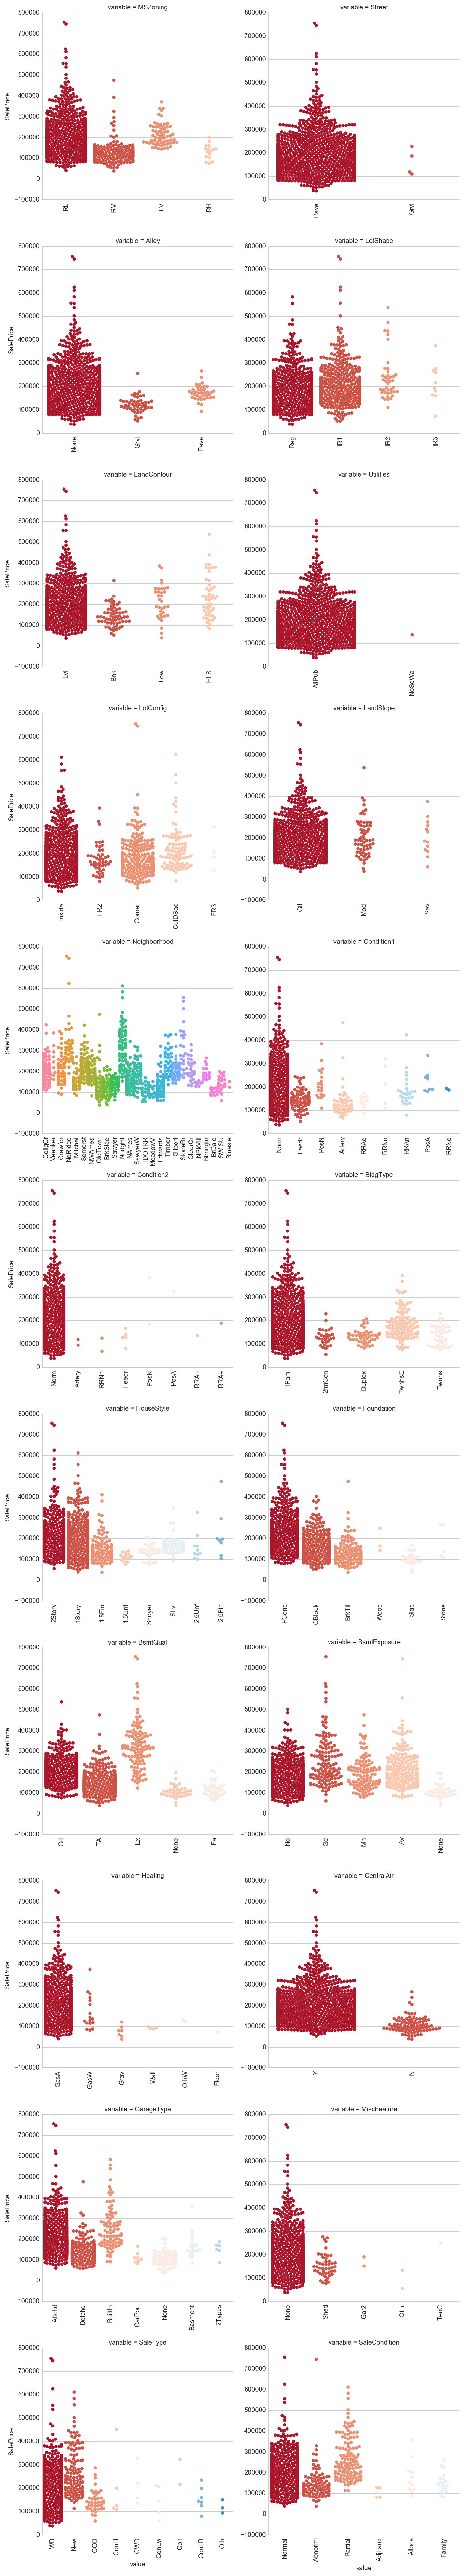

In [23]:
for c in categorical:
    Xcaty[c] = Xcaty[c].astype('category')
    
def swarmplot(x, y, **kwargs):
    sns.swarmplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(Xcaty, id_vars=['SalePrice'])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(swarmplot, "value", "SalePrice")

From the swarmplots it can be seen that some of the categorical features are very unbalanced. I will drop the "Utilities" feature as there is only 1 row that has no sewer system. I will also try to combine some labels within features to attempt to binarize them.

In [24]:
Xcatydrop = Xcaty.drop('Utilities', axis = 1)

In [25]:
categorical.remove('Utilities')
print categorical

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'Foundation', 'BsmtQual', 'BsmtExposure', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']


In [26]:
Xcat = X[categorical]

> Now it's time to do the one-hot encoding for the categorical features to prepare it for regression.

In [27]:
Xcatdum = pd.get_dummies(Xcat,drop_first=True)
print Xcatdum.shape
Xcatdum.head()

(1449, 110)


,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [28]:
Xnew = pd.concat([Xcatdum, Xconty], axis=1)
Xnew.head()

,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,sumnull,SalePrice
0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,60,65.0,8450,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,5,208500.0
1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,20,80.0,9600,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,4,181500.0
2,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,60,68.0,11250,2001,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,4,223500.0
3,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,70,60.0,9550,1915,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,4,140000.0
4,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,60,84.0,14260,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,4,250000.0


In [29]:
print Xnew.shape

(1449, 145)


In [30]:
test = Xnew[Xnew['YrSold'] == 2010]
train = Xnew[Xnew['YrSold'] != 2010]
print test.shape, train.shape

(172, 145) (1277, 145)


> Train-test split

In [31]:
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice'].values
X_test = test.drop('SalePrice', axis=1)
y_test = test['SalePrice'].values
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(1277, 144) (1277,)
(172, 144) (172,)


> Time to scale the X (predictor) matrix.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

In [33]:
print Xs_train.shape

(1277, 144)


In [119]:
from sklearn.linear_model import ElasticNetCV
En = ElasticNetCV()

En = ElasticNetCV(l1_ratio = np.linspace(0.05,1,20),alphas = np.logspace(-3,2,100),n_jobs=-2, cv=5)
En.fit(Xs_train, y_train)



ElasticNetCV(alphas=array([  1.00000e-03,   1.12332e-03, ...,   8.90215e+01,   1.00000e+02]),
       copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ]),
       max_iter=1000, n_alphas=100, n_jobs=-2, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [120]:
print 'L1 ratio:' + str(En.l1_ratio_)
print 'Intercept:' + str(En.intercept_)

L1 ratio:0.95
Intercept:182001.129209


In [131]:
coefs = pd.DataFrame(En.coef_,X_train.columns, columns=['Coefficients'])
coefs.sort_values('Coefficients', axis=0, ascending=False, inplace=True)
coefs.head() #top 5 coefficients. Best estimators of price.

,Coefficients
GrLivArea,10217.902468
Neighborhood_NridgHt,8701.802035
Neighborhood_NoRidge,7400.449414
1stFlrSF,6674.749059
GarageCars,6487.387012


In [132]:
coefs.tail() # bottom 5 coefficients

,Coefficients
Condition2_PosN,-3822.759663
BsmtExposure_No,-3996.650009
Neighborhood_Edwards,-4246.515588
BsmtQual_TA,-5391.822241
BsmtQual_Gd,-5883.851368


In [44]:
pred = En.predict(Xs_test)
print pred[:5]
print y_test[:5]

[ 153834.06381941  148443.66294872  128685.62563598  290326.37596913
  176941.36640437]
[ 149000.  154000.  134800.  306000.  165500.]


In [45]:
residual = y_test - pred
print residual[:5]

[ -4834.06381941   5556.33705128   6114.37436402  15673.62403087
 -11441.36640437]


R2 Score:0.870576696531


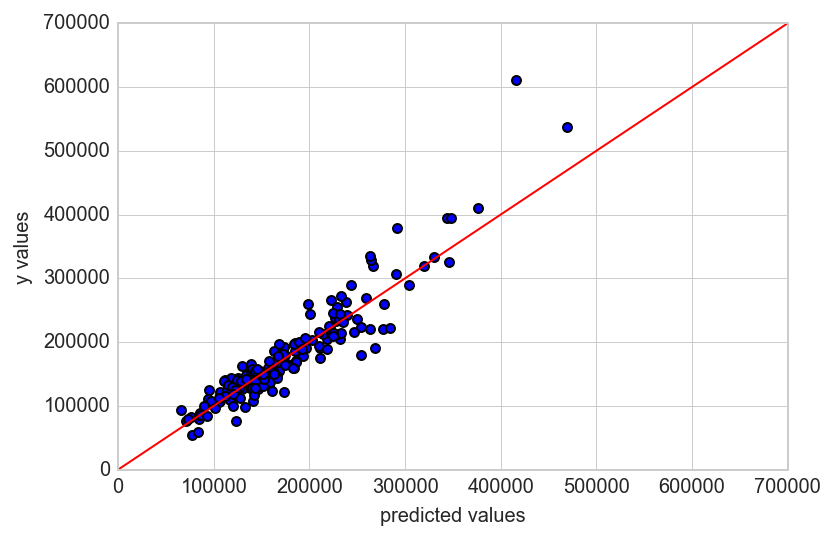

In [134]:
plt.scatter(pred, y_test)
plt.ylabel('y values')
plt.xlabel('predicted values')
plt.axis([0, 700000, 0, 700000])
plt.plot([0,700000],[0,700000],'r')
print 'R2 Score:' + str(En.score(Xs_test, y_test))

 > Score is good. Although, I took a look at the saleprice and saw that it was right skewed and therefore a good candidate for a log transform. Let's take a look at the plots.

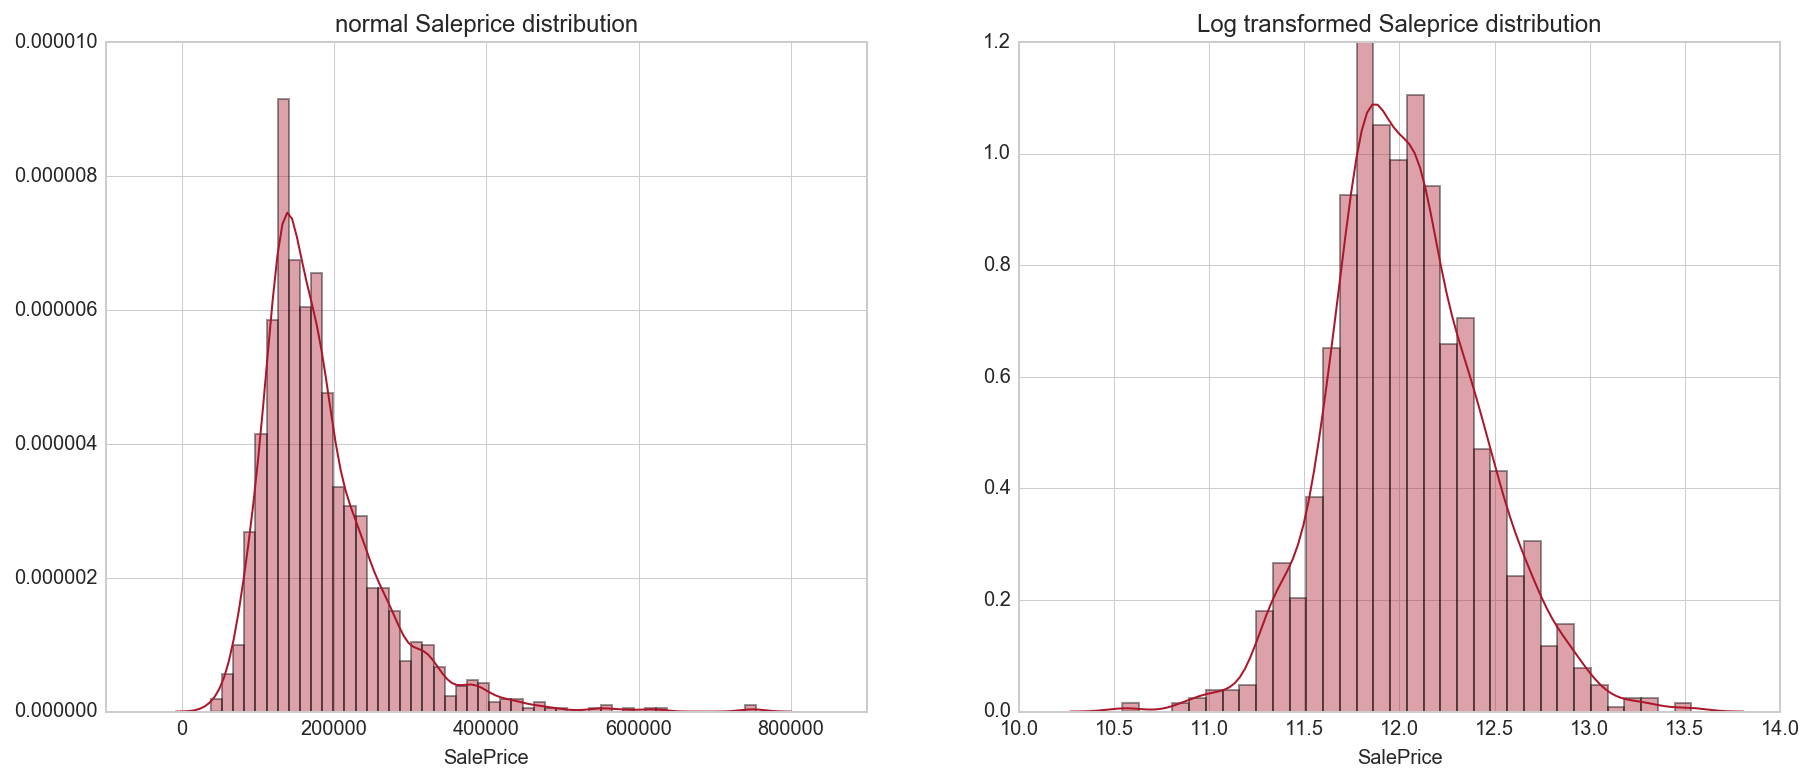

In [96]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
ax[0].set_title('Normal Saleprice distribution')
sns.distplot(y, ax=ax[0])
ax[1].set_title('Log transformed Saleprice distribution')
sns.distplot(y.apply(lambda x: np.log(x)), ax=ax[1])

> Definitely looks more normal in distribution now. Let's run the Elastic net again and see if the score improves.

logged R2 score:0.894219903777


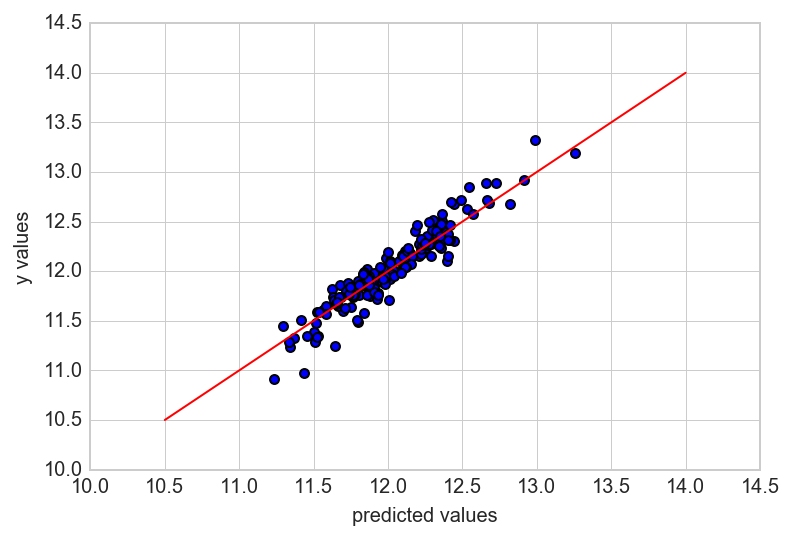

In [287]:
ylog = y.apply(lambda x: np.log(x))
Xcatylog = pd.concat([Xcat,ylog], axis=1)
Xcontylog = pd.concat([Xcont,ylog], axis=1)
Xnewlog = pd.concat([Xcatdum, Xcontylog], axis=1)
testlog = Xnewlog[Xnewlog['YrSold'] == 2010]
trainlog = Xnewlog[Xnewlog['YrSold'] != 2010]
ylog_train = trainlog['SalePrice'].values
ylog_test = testlog['SalePrice'].values

En.fit(Xs_train, ylog_train)
predlog = En.predict(Xs_test)

plt.scatter(predlog, ylog_test)
plt.ylabel('y values')
plt.xlabel('predicted values')
plt.plot([10.5,14],[10.5,14],'r')
#plt.axis([0, 700000, 0, 700000])
#plt.plot([0,700000],[0,700000],'r')
print 'logged R2 score:' + str(En.score(Xs_test, ylog_test))

> Better by 0.02. Nice. What's the RMSE compared to the non log-transformed model? Let me convert the log-transformed prices back to the real price and compare it.

In [288]:
from sklearn.metrics import mean_squared_error
retransformed_prediction = np.e**predlog

print 'log-transformed rmse:' + str(np.sqrt(mean_squared_error(y_test,retransformed_prediction)))
print 'normal rmse:' + str(np.sqrt(mean_squared_error(y_test, pred)))


log-transformed rmse:27200.2102442
normal rmse:28684.4137691


> The log transformed RMSE is 1000 lesser than the normal RMSE, proving that a log-transformed target performed better.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

*Go to the end of the question for my writeup.*

> I created the residuals feature here.

In [286]:
np.e**ylog_train

array([ 208500.,  181500.,  223500., ...,  185000.,  175000.,  147500.])

In [289]:
predtrain = En.predict(Xs_train)
residuals_train = (np.e**ylog_train) - np.e**(predtrain)
residuals = (np.e**ylog_test) - (np.e**predlog)
print residuals_train[:5]
print residuals[:5]

[  8608.08279963  -7288.28535848  13092.68083642 -41151.02611843
 -48891.02256136]
[  -550.6294827    8467.89918848   5399.26490844  28346.18252437
  -3183.05602254]


>I then added the YearSold column into the renovatables features to be able to split it up to the respective test and train sets

In [290]:
renovatables = ['OverallQual','OverallCond','YearRemodAdd','RoofStyle','RoofMatl', \
                'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond', \
                'BsmtCond','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual', \
                'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond',\
                'PavedDrive','PoolQC','Fence','Electrical']

renovatables.append('YrSold')
print renovatables
Xr = X[renovatables]

['OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'Electrical', 'YrSold']


In [291]:
Xr.dtypes

OverallQual      int64
OverallCond      int64
YearRemodAdd     int64
RoofStyle       object
RoofMatl        object
Exterior1st     object
Exterior2nd     object
MasVnrType      object
ExterQual       object
ExterCond       object
BsmtCond        object
BsmtFinType1    object
BsmtFinType2    object
HeatingQC       object
KitchenQual     object
Functional      object
FireplaceQu     object
GarageFinish    object
GarageQual      object
GarageCond      object
PavedDrive      object
PoolQC          object
Fence           object
Electrical      object
YrSold           int64
dtype: object

In [292]:
Xr['BsmtCond'].unique()

array(['TA', 'Gd', 'None', 'Fa', 'Po'], dtype=object)

> In here, I replaced the ordinal features into integers representing their quality.

In [293]:
Xr['ExterQual'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1], inplace=True)
Xr['ExterCond'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1], inplace=True)
Xr['BsmtCond'].replace(['Ex','Gd','TA','Fa','Po','None'],[5,4,3,2,1,0], inplace=True)
Xr['BsmtFinType1'].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','None'],[6,5,4,3,2,1,0], inplace=True)
Xr['BsmtFinType2'].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','None'],[6,5,4,3,2,1,0], inplace=True)
Xr['HeatingQC'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1], inplace=True)
Xr['KitchenQual'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1], inplace=True)
Xr['Functional'].replace(['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'],[8,7,6,5,4,3,2,1], inplace=True)
Xr['FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po','None'],[5,4,3,2,1,0], inplace=True)
Xr['GarageFinish'].replace(['Fin','RFn','Unf','None'],[3,2,1,0], inplace=True)
Xr['GarageQual'].replace(['Ex','Gd','TA','Fa','Po','None'],[5,4,3,2,1,0], inplace=True)
Xr['GarageCond'].replace(['Ex','Gd','TA','Fa','Po','None'],[5,4,3,2,1,0], inplace=True)
Xr['PoolQC'].replace(['Ex','Gd','TA','Fa','None'],[4,3,2,1,0], inplace=True)
Xr['Fence'].replace(['GdPrv','MnPrv','GdWo','MnWw','None'],[4,3,2,1,0], inplace=True)

In [294]:
Xr.dtypes

OverallQual      int64
OverallCond      int64
YearRemodAdd     int64
RoofStyle       object
RoofMatl        object
Exterior1st     object
Exterior2nd     object
MasVnrType      object
ExterQual        int64
ExterCond        int64
BsmtCond         int64
BsmtFinType1     int64
BsmtFinType2     int64
HeatingQC        int64
KitchenQual      int64
Functional       int64
FireplaceQu      int64
GarageFinish     int64
GarageQual       int64
GarageCond       int64
PavedDrive      object
PoolQC           int64
Fence            int64
Electrical      object
YrSold           int64
dtype: object

In [295]:
rcategorical = [col for col in Xr.columns if Xr[col].dtype == object]
rcontinuous = [col for col in Xr.columns if Xr[col].dtype != object]

In [298]:
Xrcont = Xr[rcontinuous]  # Continuous predictors
Xrcat = Xr[rcategorical]  # Categorical predictors
Xrcaty = pd.concat([Xrcat,y], axis=1)
Xrconty = pd.concat([Xrcont,y], axis=1)
print Xrcat.shape, Xrcont.shape
print Xrcaty.shape, Xrconty.shape

(1449, 7) (1449, 18)
(1449, 8) (1449, 19)


> Got dummies for categorical features

In [300]:
Xrcat.dtypes

RoofStyle      object
RoofMatl       object
Exterior1st    object
Exterior2nd    object
MasVnrType     object
PavedDrive     object
Electrical     object
dtype: object

In [299]:
Xrcatdum = pd.get_dummies(Xrcat,drop_first=True)
print Xrcatdum.shape
Xrcatdum.head()

(1449, 50)


,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [301]:
Xnewr = pd.concat([Xrcatdum, Xrconty], axis=1)
Xnewr.head()

,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,OverallQual,OverallCond,YearRemodAdd,ExterQual,ExterCond,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,YrSold,SalePrice
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,7,5,2003,4,3,3,6,1,5,4,8,0,2,3,3,0,0,2008,208500
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,6,8,1976,3,3,3,5,1,5,3,8,3,2,3,3,0,0,2007,181500
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,7,5,2002,4,3,3,6,1,5,4,8,3,2,3,3,0,0,2008,223500
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,7,5,1970,3,3,4,5,1,4,4,8,4,1,3,3,0,0,2006,140000
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,8,5,2000,4,3,3,6,1,5,4,8,3,2,3,3,0,0,2008,250000


> New test and training set

In [303]:
testr = Xnewr[Xnewr['YrSold'] == 2010]
trainr = Xnewr[Xnewr['YrSold'] != 2010]
print testr.shape, trainr.shape
testr['residuals'] = residuals
trainr['residuals'] = residuals_train
testr['Salepred'] = np.e**predlog
trainr['Salepred'] = np.e**predtrain
testr.head()

(172, 69) (1277, 69)


/Users/melvinperera/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/melvinperera/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/melvinperera/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,OverallQual,OverallCond,YearRemodAdd,ExterQual,ExterCond,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,YrSold,SalePrice,residuals,Salepred
16,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,6,7,1970,3,3,3,5,1,5,3,8,3,3,3,3,0,0,2010,149000,-550.629483,149550.629483
24,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,5,8,2001,3,4,3,3,5,5,4,8,3,1,3,3,0,3,2010,154000,8467.899188,145532.100812
26,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,5,7,2000,3,3,3,4,3,3,4,8,0,1,3,3,0,0,2010,134800,5399.264908,129400.735092
27,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,8,5,2008,4,3,3,6,1,5,4,8,4,2,3,3,0,0,2010,306000,28346.182524,277653.817476
33,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,5,5,1959,3,3,3,3,1,4,4,8,4,2,3,3,0,0,2010,165500,-3183.056023,168683.056023


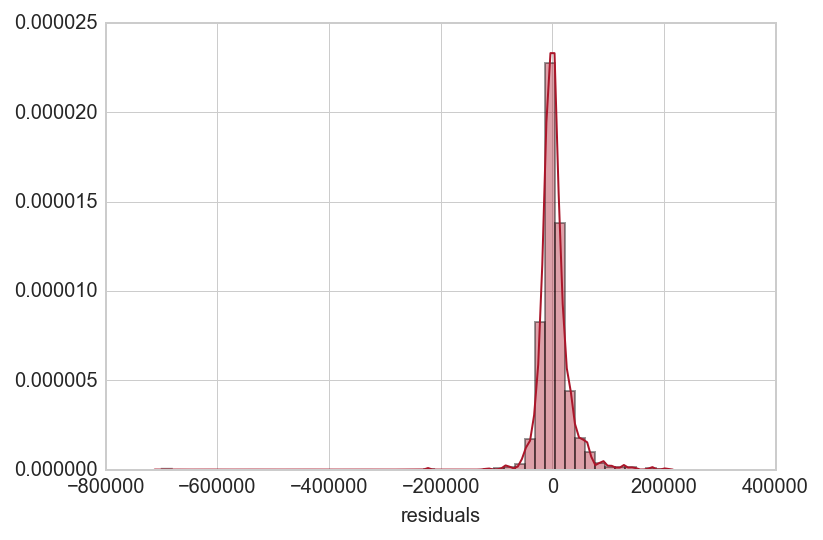

In [304]:
sns.distplot(trainr['residuals'])

In [305]:
Xr_train = trainr.drop(['SalePrice','Salepred','YrSold','residuals'], axis=1)
yr_train = trainr['residuals'].values
Xr_test = testr.drop(['SalePrice','Salepred','YrSold','residuals'], axis=1)
yr_test = testr['residuals'].values
print Xr_train.shape, yr_train.shape
print Xr_test.shape, yr_test.shape

(1277, 67) (1277,)
(172, 67) (172,)


In [498]:
scalerr = StandardScaler().fit(Xr_train)

Xrs_train = scalerr.transform(Xr_train)
Xrs_test = scalerr.transform(Xr_test)
Enr = ElasticNetCV(l1_ratio = np.linspace(0.05,1,20),alphas = np.logspace(-3,3,100),n_jobs=-2, cv=5)
Enr.fit(Xrs_train, yr_train)


ElasticNetCV(alphas=array([  1.00000e-03,   1.14976e-03, ...,   8.69749e+02,   1.00000e+03]),
       copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ]),
       max_iter=1000, n_alphas=100, n_jobs=-2, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [499]:
print "alpha:" + str(Enr.alpha_)
print "l1_ratio:" + str(Enr.l1_ratio_)
print "intercept:" + str(Enr.intercept_)

alpha:20.0923300257
l1_ratio:0.95
intercept:2982.47092762


In [500]:
predr = Enr.predict(Xrs_test) # predicting the test

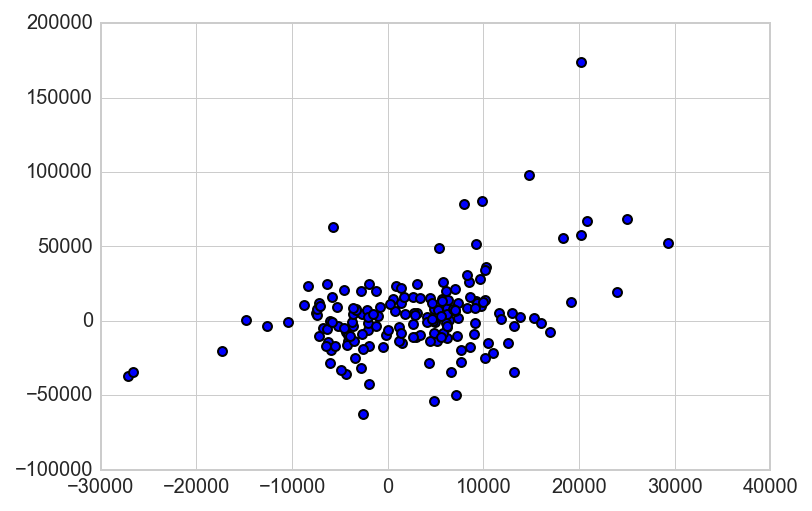

In [501]:
plt.scatter(predr, yr_test)

In [502]:
print "Score:" + str(Enr.score(Xrs_test, yr_test))

Score:0.155848941739


In [311]:
coefsr = pd.DataFrame(Enr.coef_, Xr_train.columns, columns = ['Coefficients'])
coefsr = coefsr.sort_values('Coefficients', axis=0, ascending=False)

In [312]:
coefsr.loc[coefsr['Coefficients'] != 0]

,Coefficients
OverallCond,3143.631676
RoofMatl_WdShngl,2910.751371
OverallQual,2889.437813
KitchenQual,1977.280483
RoofMatl_CompShg,1622.688307
Functional,1340.588296
Exterior1st_BrkFace,1306.074755
ExterQual,1200.012099
BsmtFinType1,1042.391067
Exterior2nd_ImStucc,1041.557391


> So these are the coefficients of the renovatables that contribute to the residuals. 
Now I am going to try another model with the predicted salesprice added in as a feature, and using that to predict the original SalesPrice.

In [466]:
Xr2_train = trainr.drop(['SalePrice','YrSold','residuals'], axis=1)
Xr2_train['Salepred'] = Xr2_train['Salepred']
yr2_train = trainr['SalePrice'].values
Xr2_test = testr.drop(['SalePrice','YrSold','residuals'], axis=1)
Xr2_test['Salepred'] = Xr2_test['Salepred']
yr2_test = testr['SalePrice'].values
print Xr_train.shape, yr_train.shape
print Xr_test.shape, yr_test.shape

(1277, 67) (1277,)
(172, 67) (172,)


In [476]:
Xr2_train.head()

,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,OverallQual,OverallCond,YearRemodAdd,ExterQual,ExterCond,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,Salepred
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,7,5,2003,4,3,3,6,1,5,4,8,0,2,3,3,0,0,199891.917200
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,6,8,1976,3,3,3,5,1,5,3,8,3,2,3,3,0,0,188788.285358
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,7,5,2002,4,3,3,6,1,5,4,8,3,2,3,3,0,0,210407.319164
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,7,5,1970,3,3,4,5,1,4,4,8,4,1,3,3,0,0,181151.026118
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,8,5,2000,4,3,3,6,1,5,4,8,3,2,3,3,0,0,298891.022561


In [468]:
yr2_train[:5]

array([208500, 181500, 223500, 140000, 250000])

In [488]:
scalerr2 = StandardScaler().fit(Xr2_train)

#Xrs2_train = scalerr2.transform(Xr2_train)
#Xrs2_test = scalerr2.transform(Xr2_test)
Xrs2_train = Xr2_train   #Didn't scale here.
Xrs2_test = Xr2_test
Enr2 = ElasticNetCV(l1_ratio = np.linspace(0.05,1,20),alphas = np.logspace(-3,3,100),n_jobs=-2, cv=5)
Enr2.fit(Xrs2_train, yr2_train)


ElasticNetCV(alphas=array([  1.00000e-03,   1.14976e-03, ...,   8.69749e+02,   1.00000e+03]),
       copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ]),
       max_iter=1000, n_alphas=100, n_jobs=-2, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [489]:
predr2 = Enr2.predict(Xrs2_test)

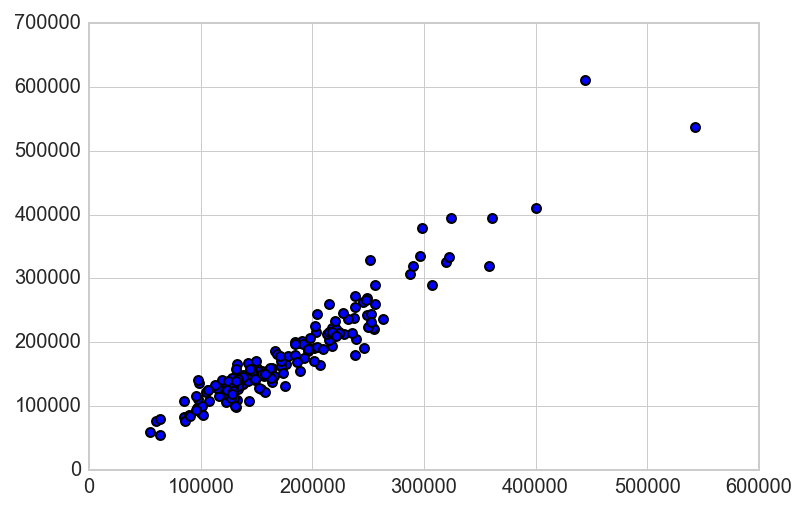

In [490]:
plt.scatter(predr2, yr2_test)

In [491]:
Enr2.score(Xrs2_test, yr2_test) # Suprisingly my score is great without scaling.

0.90371367181776829

In [492]:
coefsr2 = pd.DataFrame(dict(zip(Xr2_train.columns,Enr2.coef_)), index=['Coefficient'])

coefsr2 = coefsr2.transpose().sort_values('Coefficient', axis=0, ascending=False)
coefsr2.loc[coefsr2['Coefficient'] != 0]

,Coefficient
RoofMatl_WdShngl,38113.680480
OverallQual,9727.652633
Exterior1st_BrkFace,9581.208561
KitchenQual,6076.819232
RoofMatl_CompShg,5586.767165
OverallCond,5229.861483
Exterior1st_CemntBd,3242.732024
Functional,2040.166621
ExterQual,1977.004681
BsmtFinType1,1492.888420


> By not scaling the renovatables, I get a true picture of how the coefficients of the renovatables affect the price of the property

At first, I used the residuals calculated from the first model (y-h) as a target for the renovatables to predict. With that, a positive coefficient of a renovatable feature represents that there is a  positive correlation between that feature and the residual. This means that the difference between the actual sale price and the prediction from the model can be explained in some way by this renovatable feature. However, the renovatables had a very poor R^2 score to the residuals, and I decided to change my approach.

After thinking more, I decided to use the second model which attaches a coefficient to the nonrenovatables prediction and uses it as a feature. By not scaling the features of the renovatables, I got a better sense of how the features are affecting the salesprice prediction of the property. 


Looking at the coefficients: I can see that OverallQual is the most important feature that would boost the price of the house if the value is increased. Every increase in point for OverallQual leads to about \$9727 in price increment. Another interesting feature is the exterior feature of the house. By changing the Exterior from Stucco to a BrickFace, I would have an increment in SalePrice by $18112!

> A notable anomaly, however, is the Pool Quality. The better the pool quality the worse the predicted SalePrice of the house. However, this can be explained by taking a look at the PoolQC value counts.

In [504]:
df['PoolQC'].value_counts() # Definitely imbalanced

None    1442
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

This isn't good. Are the other features imbalanced as well?

In [505]:
df['Exterior1st'].value_counts() # Not too balanced either, especially for the rare ones

VinylSd    514
HdBoard    222
MetalSd    215
Wd Sdng    204
Plywood    107
CemntBd     61
BrkFace     49
WdShing     26
Stucco      25
AsbShng     19
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [507]:
df['OverallQual'].value_counts() # Not balanced as well

5     395
6     373
7     319
8     168
4     111
9      43
10     18
3      18
2       2
1       2
Name: OverallQual, dtype: int64

In [508]:
df['OverallCond'].value_counts() # Not balanced

5    818
6    250
7    204
8     72
4     54
3     24
9     22
2      4
1      1
Name: OverallCond, dtype: int64

**I think this model can be trusted only for coefficients with balanced classes, and definitely not for imbalanced classes which may not predict the salesprice well.**
Maybe with stratified sampling a better result would appear.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [365]:
df.loc[df['SaleCondition'] != 'Abnorml','SaleCondition'] = 0
df.loc[df['SaleCondition'] == 'Abnorml','SaleCondition'] = 1

In [366]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,sumnull
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,0,208500,5
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,0,181500,4
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,0,223500,4
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,1,140000,4
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,0,250000,4


In [367]:
df.loc[df['SaleCondition'] == 1,'SaleCondition'].count()

96

In [368]:
df.loc[df['SaleCondition'] == 0,'SaleCondition'].count()

1353

In [369]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,sumnull
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,0,208500,5
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,0,181500,4
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,0,223500,4
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,1,140000,4
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,0,250000,4


In [370]:
Xtestest = df[[col for col in df.columns if col != 'SaleCondition']]
Ytesttest = df['SaleCondition']
Xtestest.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice,sumnull
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,208500,5
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,181500,4
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,223500,4
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,140000,4
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,250000,4


In [371]:
from imblearn.combine import SMOTEENN
Xtestestt = pd.get_dummies(Xtestest, drop_first = True)
print Xtestestt.shape
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(Xtestestt, Ytesttest)

(1449, 255)


/Users/melvinperera/anaconda/lib/python2.7/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
/Users/melvinperera/anaconda/lib/python2.7/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
/Users/melvinperera/anaconda/lib/python2.7/site-packages/imblearn/base.py:343: UserWarning: The target type should be binary or multiclass.
  warnings.warn('The target type should be binary or multiclass.')


In [392]:
Xtestestt.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,sumnull,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,5,0,1,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,4,0,1,0,...,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,4,0,1,0,...,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,4,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,4,0,1,0,...,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [372]:
print X_resampled.shape

(2405, 255)


In [373]:
print Ytesttest.unique()

[0 1]


In [375]:
print Ytesttest.value_counts()

0    1353
1      96
Name: SaleCondition, dtype: int64


In [390]:
np.unique(y_resampled,return_counts=True)

(array([0, 1], dtype=object), array([1353, 1052]))

In [402]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [396]:
Xtree = pd.DataFrame(X_resampled, columns=Xtestestt.columns)

In [397]:
Xtree.shape

(2405, 255)

In [418]:
ytree = pd.Series(y_resampled)

In [419]:
ytree.head()

0    0
1    0
2    0
3    0
4    0
dtype: object

In [425]:
from sklearn.cross_validation import train_test_split
Xtree_train, Xtree_test, ytree_train, ytree_test = train_test_split(Xtree,ytree, random_state = 5, test_size = 0.3)

In [426]:
print Xtree_train.shape, Xtree_test.shape, ytree_train.shape, ytree_test.shape

(1683, 255) (722, 255) (1683,) (722,)


In [427]:
ytree_train

2328    1
767     0
811     0
1729    1
1780    1
1591    1
150     0
1341    0
2089    1
1157    0
1790    1
2382    1
436     0
1125    0
866     0
458     0
70      0
2229    1
2309    1
46      0
253     0
254     0
1513    1
479     0
1961    1
212     0
2082    1
1516    1
2141    1
976     0
87      0
2176    1
1523    1
2184    1
145     0
2338    1
1859    1
1254    0
515     0
1598    1
978     0
461     0
1127    0
392     0
209     0
1648    1
874     0
531     0
1110    0
838     0
       ..
986     0
14      0
528     0
391     0
853     0
801     0
1947    1
2126    1
387     0
2231    1
835     0
190     0
1694    1
364     0
1159    0
245     0
881     0
274     0
147     0
1129    0
294     0
324     0
770     0
1715    1
900     0
2000    1
2053    1
974     0
103     0
2258    1
1921    1
1470    1
41      0
1386    1
377     0
1278    0
2194    1
2004    1
205     0
1068    0
2075    1
1461    1
204     0
1982    1
740     0
1032    0
2121    1
1424    1
1725    1


In [443]:
ytree_train = np.array([int(y) for y in ytree_train])
ytree_test = np.array([int(y) for y in ytree_test])

In [444]:
ytree_train

array([1, 0, 0, ..., 1, 1, 1])

In [447]:
DT = DecisionTreeClassifier()
BC = BaggingClassifier(base_estimator = DT, n_estimators =20,max_samples = 0.5, max_features = 0.5)

# Fitting the Bag
BC.fit(Xtree_train, ytree_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [448]:
BC.estimators_features_

[array([ 46, 129,  69, 182, 191, 126, 161, 176, 165, 149,  11,  15, 180,
         36, 171, 239, 152, 120, 221, 241, 148,   4,   9, 226,  39, 244,
        188,  62, 177,  83, 209,  32,  53, 111, 248, 242, 223,  10,  29,
        107,  52, 143,  56,  20,  12, 154,  79,  23,  95, 138, 237, 208,
        186, 130, 231,   3, 232, 137, 132,  86,  68, 179, 210, 213,  93,
          1, 117,  21, 134, 113, 233,  88, 234,  67,  72,  45, 141,  55,
        184, 185, 236, 119, 147,  14,  76, 235, 114, 116,  89, 101, 122,
        136, 150, 238, 133, 112, 103,  63, 163, 155, 214, 135, 173, 201,
        174, 227,  97,  16, 104,  99,  19, 178,  54, 251, 158,  59,  35,
        253, 106, 102,   6, 169, 118,  47,  24,  78, 140]),
 array([ 85, 139, 174,  17,  32, 245, 228,  74,  39,   3, 136, 106,   0,
         36, 180, 221,  49,  14, 169,  42, 162, 213,  12,  70, 236,  18,
        179,  99, 133,  11,  84, 167, 234, 198,  72, 116, 170, 176, 196,
        120, 185,  29, 220,   7, 191, 215,  78, 240,  51, 143, 2

In [454]:
treepred = BC.predict(Xtestestt)

In [450]:
from sklearn.metrics import accuracy_score, classification_report

In [462]:
Ytesttest = np.array([int(y) for y in Ytesttest.values])

In [463]:
print classification_report(Ytesttest, treepred)

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1353
          1       0.97      0.65      0.78        96

avg / total       0.98      0.98      0.97      1449



In [464]:
BC.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [465]:
fi = pd.DataFrame({
        'feature':Xtestestt.columns,
        'importance':BC.base_estimator_.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi

NotFittedError: Estimator not fitted, call `fit` before `feature_importances_`.